In [ ]:
from sklearn.decomposition import FastICA

In [ ]:
import librosa
import numpy as np
import librosa.display
import librosa.decompose
import matplotlib.pyplot as plt
from IPython.display import display, Markdown, Audio

In [ ]:
d = {}

pn = r'A:\Dev\NF_Prj_MIMII_Dataset\dataset\min6dB\pump\id_00\normal\00000000.wav'
pa = r'A:\Dev\NF_Prj_MIMII_Dataset\dataset\min6dB\pump\id_00\abnormal\00000000.wav'    
d['pump'] = {'n': librosa.load(pn, sr=None, mono=False),
             'a': librosa.load(pa, sr=None, mono=False)}
pn = r'A:\Dev\NF_Prj_MIMII_Dataset\dataset\6dB\fan\id_00\normal\00000000.wav'
pa = r'A:\Dev\NF_Prj_MIMII_Dataset\dataset\6dB\fan\id_00\abnormal\00000000.wav'    
d['fan'] = {'n': librosa.load(pn, sr=None, mono=False),
             'a': librosa.load(pa, sr=None, mono=False)}
pn = r'A:\Dev\NF_Prj_MIMII_Dataset\dataset\6dB\slider\id_02\normal\00000000.wav'
pa = r'A:\Dev\NF_Prj_MIMII_Dataset\dataset\6dB\slider\id_02\abnormal\00000000.wav'    
d['slider'] = {'n': librosa.load(pn, sr=None, mono=False),
             'a': librosa.load(pa, sr=None, mono=False)}
pn = r'A:\Dev\NF_Prj_MIMII_Dataset\dataset\6dB\valve\id_06\normal\00000000.wav'
pa = r'A:\Dev\NF_Prj_MIMII_Dataset\dataset\6dB\valve\id_06\abnormal\00000000.wav'    
d['valve'] = {'n': librosa.load(pn, sr=None, mono=False),
             'a': librosa.load(pa, sr=None, mono=False)}

sr = d['pump']['n'][1]

In [ ]:
channels = d['pump']['n'][0]
channels.shape

In [ ]:
transformer = FastICA(n_components=3, random_state=0)
X_transformed = transformer.fit_transform(channels.T)

In [ ]:
X_transformed.shape

In [ ]:
plt.plot(X_transformed[:,0])
plt.plot(X_transformed[:,1])
plt.plot(X_transformed[:,2])

In [ ]:
display(Audio(data=X_transformed[:,0],rate=sr))
display(Audio(data=X_transformed[:,1],rate=sr))
display(Audio(data=X_transformed[:,2],rate=sr))
display(Audio(data=channels[0],rate=sr))

In [ ]:
# https://www.researchgate.net/publication/333082683_A_review_of_blind_source_separation_methods_Two_converging_routes_to_ILRMA_originating_from_ICA_and_NMF/link/5cdac9d7458515712ea9a4ff/download

In [ ]:
# JADE algorthem 

In [ ]:
# https://www.youtube.com/watch?v=nuXY6wZRMc4

In [ ]:
#conda install -c conda-forge shogun # examples not working anymore...:(

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal

from sklearn.decomposition import FastICA, PCA

# #############################################################################
# Generate sample data
np.random.seed(0)
n_samples = 2000
time = np.linspace(0, 8, n_samples)

s1 = np.sin(2 * time)  # Signal 1 : sinusoidal signal
s2 = np.sign(np.sin(3 * time))  # Signal 2 : square signal
s3 = signal.sawtooth(2 * np.pi * time)  # Signal 3: saw tooth signal

S = np.c_[s1, s2, s3]
S += 0.2 * np.random.normal(size=S.shape)  # Add noise

S /= S.std(axis=0)  # Standardize data
# Mix data
A = np.array([[1, 1, 1], [0.5, 2, 1.0], [1.5, 1.0, 2.0]])  # Mixing matrix
X = np.dot(S, A.T)  # Generate observations

# Compute ICA
ica = FastICA(n_components=3)
S_ = ica.fit_transform(X)  # Reconstruct signals
A_ = ica.mixing_  # Get estimated mixing matrix

# We can `prove` that the ICA model applies by reverting the unmixing.
assert np.allclose(X, np.dot(S_, A_.T) + ica.mean_)

# For comparison, compute PCA
pca = PCA(n_components=3)
H = pca.fit_transform(X)  # Reconstruct signals based on orthogonal components

# #############################################################################
# Plot results

plt.figure()

models = [X, S, S_, H]
names = ['Observations (mixed signal)',
         'True Sources',
         'ICA recovered signals',
         'PCA recovered signals']
colors = ['red', 'steelblue', 'orange']

for ii, (model, name) in enumerate(zip(models, names), 1):
    plt.subplot(4, 1, ii)
    plt.title(name)
    for sig, color in zip(model.T, colors):
        plt.plot(sig, color=color)

plt.tight_layout()
plt.show()

In [ ]:
X.shape

In [ ]:
S.shape

In [ ]:
ica = FastICA(n_components=2)

S_ = ica.fit_transform(channels.T)  # Reconstruct signals
A_ = ica.mixing_  # Get estimated mixing matrix

In [ ]:
plt.plot(S_)

In [ ]:
channels = d['slider']['n'][0]
channels.shape

ica = FastICA(n_components=2)

S_ = ica.fit_transform(channels.T)  # Reconstruct signals
A_ = ica.mixing_  # Get estimated mixing matrix


f, Py = signal.welch(channels[0],
                           fs=sr,
                           window='hamming',
                           nperseg=512, 
                           noverlap=False, 
                           nfft=1024,
                           scaling='spectrum')
plt.plot(f,Py, label='ch0')
display(Audio(data=channels[0], rate=sr))
for ic in range(S_.shape[1]):
    f, Py = signal.welch(S_[:,ic],
                           fs=sr,
                           window='hamming',
                           nperseg=512, 
                           noverlap=False, 
                           nfft=1024,
                           scaling='spectrum')

    plt.plot(f,Py,label=str(ic))
    plt.yscale('log')
    display(Audio(data=S_[:,ic], rate=sr))
plt.legend()

In [ ]:
channels = d['slider']['n'][0]
channels.shape
c
plt.plot(channels[1])
plt.plot(fdata[1])


In [ ]:
channels = d['valve']['a'][0]
channels.shape
filtcut = 30
filtb,filta = signal.butter(7,filtcut/(sr/2),btype='high')
fdata = signal.filtfilt(filtb,filta,channels)

ica = FastICA(n_components=2)

S_ = ica.fit_transform(fdata.T)  # Reconstruct signals
A_ = ica.mixing_  # Get estimated mixing matrix


f, Py = signal.welch(channels[0],
                           fs=sr,
                           window='hamming',
                           nperseg=512, 
                           noverlap=False, 
                           nfft=1024,
                           scaling='spectrum')
plt.plot(f,Py, label='ch0')
display(Audio(data=channels[0], rate=sr))
for ic in range(S_.shape[1]):
    f, Py = signal.welch(S_[:,ic],
                           fs=sr,
                           window='hamming',
                           nperseg=512, 
                           noverlap=False, 
                           nfft=1024,
                           scaling='spectrum')

    plt.plot(f,Py,label=str(ic))
    plt.yscale('log')
    display(Audio(data=S_[:,ic], rate=sr))
plt.legend()

In [ ]:

A_.shape

In [ ]:
for i in range(A_.shape[0]):
    plt.plot(A_[i,:], label='ch' + str(i))
             
             
plt.legend()
plt.xlabel('ica')
plt.ylabel('mixing ratio')

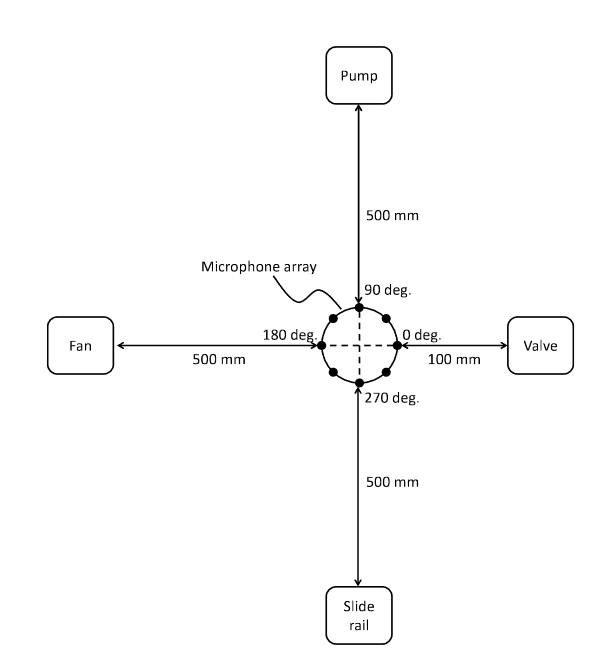


In [ ]:
plt.plot(channels[2])
plt.plot(channels[6])


In [ ]:
for i in [4,0, 2]:
    f, Py = signal.welch(channels[i],
                           fs=sr,
                           window='hamming',
                           nperseg=512, 
                           noverlap=False, 
                           nfft=1024,
                           scaling='spectrum')
    plt.plot(f,Py, label='ch'+str(i))
plt.legend()

In [ ]:
channels = d['slider']['n'][0]
channels.shape
filtcut = 30
filtb,filta = signal.butter(7,filtcut/(sr/2),btype='high')
fdata = signal.filtfilt(filtb,filta,channels)

pca = PCA(n_components=8)

S_ = pca.fit_transform(fdata.T)  # Reconstruct signals
A_ = pca.explained_variance_ratio_  # Get estimated mixing matrix
print(A_)

f, Py = signal.welch(channels[0],
                           fs=sr,
                           window='hamming',
                           nperseg=512, 
                           noverlap=False, 
                           nfft=1024,
                           scaling='spectrum')
plt.plot(f,Py, label='ch0')
display(Audio(data=channels[0], rate=sr))
for ic in range(S_.shape[1]):
    f, Py = signal.welch(S_[:,ic],
                           fs=sr,
                           window='hamming',
                           nperseg=512, 
                           noverlap=False, 
                           nfft=1024,
                           scaling='spectrum')

    plt.plot(f,Py,label=str(ic))
    plt.yscale('log')
    display(Audio(data=S_[:,ic], rate=sr))
plt.legend()